<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Homework3/Homework3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and attaching drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Binary map Outputs to 0 or 1
# M = 1
# B = 0
# Map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

dataset[['diagnosis']] = dataset[['diagnosis']].apply(binary_map)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
## PROBLEM 2A
# Seperate data into inputs and outputs
x_vars = np.arange(2, 31, 1)
X = dataset.iloc[:, x_vars].values
Y = dataset.iloc[:, 1].values
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01])

In [ ]:
# Split into test and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Standarize the data sets to remove size differences
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)
X_test = stdScaler.transform(X_test)
X_train[0]

array([-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
       -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
       -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
       -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
       -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
       -0.73009743, -0.81232053, -0.75798367, -0.01614761])

In [ ]:
# Using training set, build classifier using logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# Predict the output using the trained classifier
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Create a confusion matrix to test accuracy
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[65,  2],
       [ 3, 44]])

In [ ]:
# Using the metrics class to find distinct values
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:", metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1: 0.9462365591397849


Text(0.5, 427.9555555555555, 'Predicted')

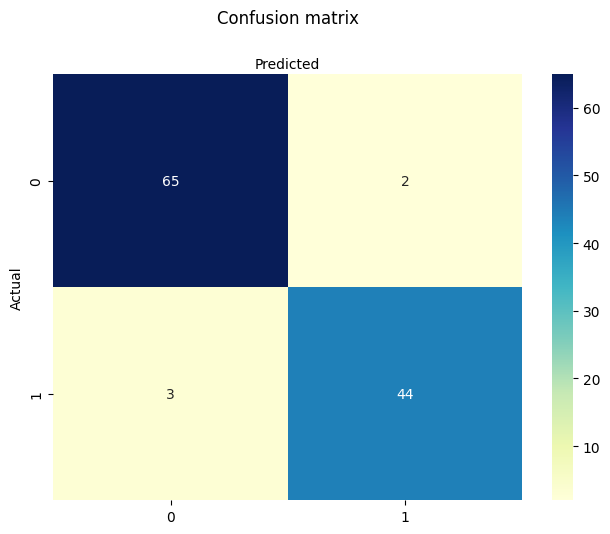

In [ ]:
# This library class sets up a visual form of the confusion matrix array above
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
## PROBLEM 2B
# Using the split sets from above
C = [10, 1, .5, .1, .01]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')

C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.5
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.01
Training accuracy: 0.9274725274725275
Test accuracy: 0.9210526315789473



In [ ]:
# 0.1 has the smallest difference in accuracy between sets
c = 0.1
classifier = LogisticRegression(penalty='l1', C=c, solver='liblinear', random_state=0)
classifier.fit(X_train, Y_train)

# Predict the output using the trained classifier
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Create a confusion matrix to test accuracy
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[66,  1],
       [ 2, 45]])

In [ ]:
# Using the metrics class to find distinct values
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:", metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1: 0.967741935483871


Text(0.5, 427.9555555555555, 'Predicted')

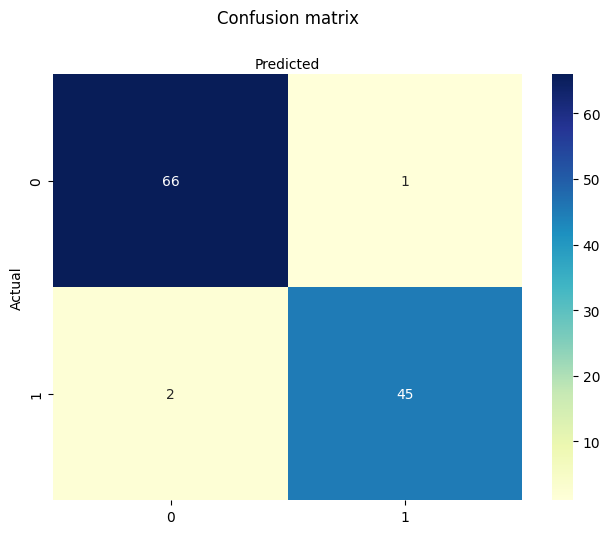

In [ ]:
# This library class sets up a visual form of the confusion matrix array above
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')